In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from vivarium import InteractiveContext

from village_simulator.constants import Columns, Pipelines

In [2]:
sim = InteractiveContext("../src/village_simulator/simulation/specification.yaml")

In [3]:
p_0 = sim.get_population()
p_0

,tracked,y,x,terrain,previous_day_dry,cumulative_dry_days,rainfall_late_growth,rainfall_mid_growth,temperature,rainfall,is_village,arable_land,female_population_size,male_population_size,wheat_stores,projected_wheat_harvest,wood_stores,stone_stores,bronze_stores
0,True,0,0,mountain,False,0.0,0.0,0.0,NaN,NaN,True,0.102782,51,51,54.829527,51.537216,739.157973,689.866960,221.218363
1,True,1,0,grassland,False,0.0,0.0,0.0,NaN,NaN,True,0.923784,463,461,504.553152,468.217701,5686.664804,4000.182673,2960.501189
2,True,2,0,grassland,False,0.0,0.0,0.0,NaN,NaN,True,0.923332,459,464,380.726987,457.312508,6467.913487,3415.358464,2813.293339
3,True,3,0,grassland,False,0.0,0.0,0.0,NaN,NaN,True,0.732768,372,360,504.262607,364.071805,5291.776249,3518.677276,2050.415162
4,True,4,0,forest,False,0.0,0.0,0.0,NaN,NaN,False,0.397170,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
5,True,0,1,grassland,False,0.0,0.0,0.0,NaN,NaN,True,0.786373,399,389,391.146280,413.646067,6897.368252,3114.420394,2611.232752
6,True,1,1,mountain,False,0.0,0.0,0.0,NaN,NaN,False,0.114879,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
7,True,2,1,forest,False,0.0,0.0,0.0,NaN,NaN,False,0.638393,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
8,True,3,1,forest,False,0.0,0.0,0.0,NaN,NaN,False,0.556283,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
9,True,4,1,forest,False,0.0,0.0,0.0,NaN,NaN,True,0.230069,115,115,105.526773,115.820470,1339.683193,903.579589,764.270717


In [4]:
%%time
data = []
for _ in tqdm(range(400)):
    sim.step()
    temperature = sim.get_population()
    dates = pd.Series(sim._clock.time, name="date", index=temperature.index)
    data.append(pd.concat([dates, temperature], axis=1))

data = pd.concat(data)

100%|█████████████████████████████████████████████████████| 400/400 [01:07<00:00,  5.95it/s]


CPU times: user 1min 7s, sys: 147 ms, total: 1min 7s
Wall time: 1min 7s


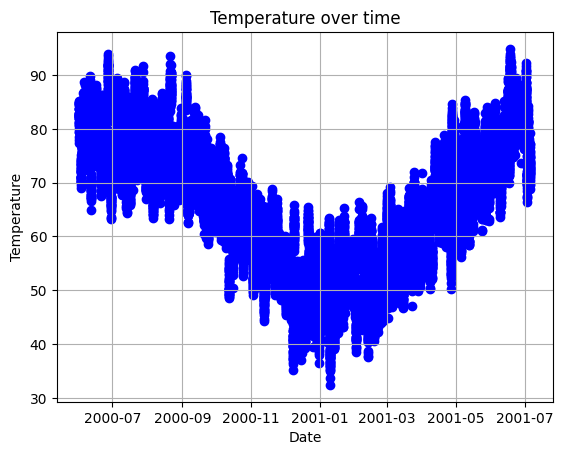

In [9]:
import matplotlib.pyplot as plt

# Sample data
x = data["date"]
y = data[Columns.TEMPERATURE]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature over time')

# Show the plot
plt.grid(True)
plt.show()

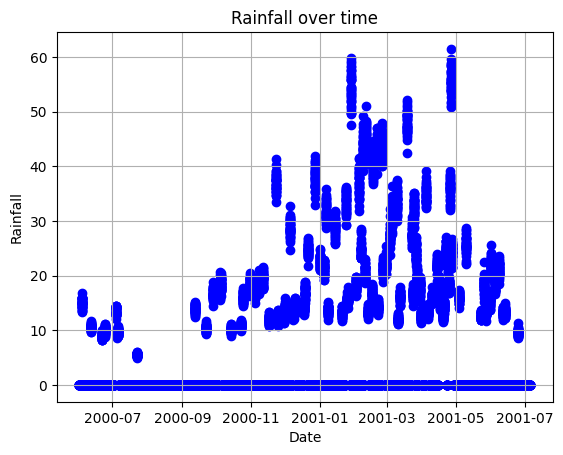

In [10]:
# Sample data
x = data["date"]
y = data[Columns.RAINFALL]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall over time')

# Show the plot
plt.grid(True)
plt.show()

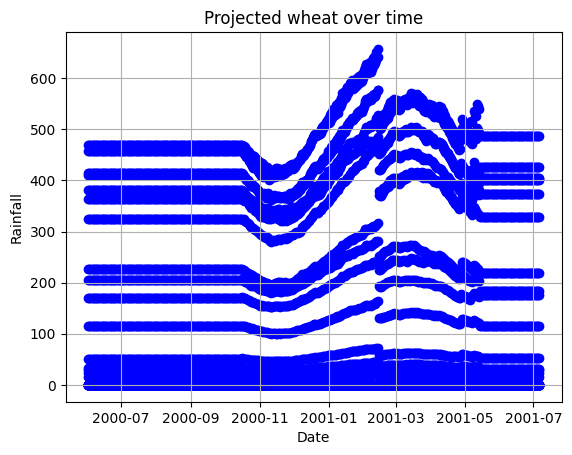

In [11]:
# Sample data
x = data["date"]
y = data[Columns.PROJECTED_WHEAT_HARVEST]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Projected wheat over time')

# Show the plot
plt.grid(True)
plt.show()

In [12]:
data[Columns.RAINFALL].mean()

5.143200289295755

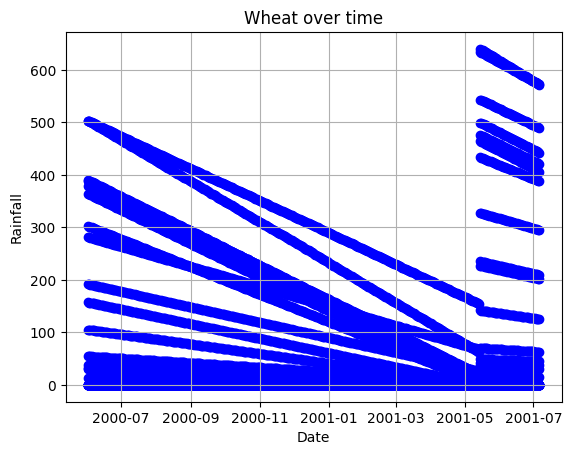

In [13]:
# Sample data
x = data["date"]
y = data[Columns.get_resource_stores("wheat")]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Wheat over time')

# Show the plot
plt.grid(True)
plt.show()

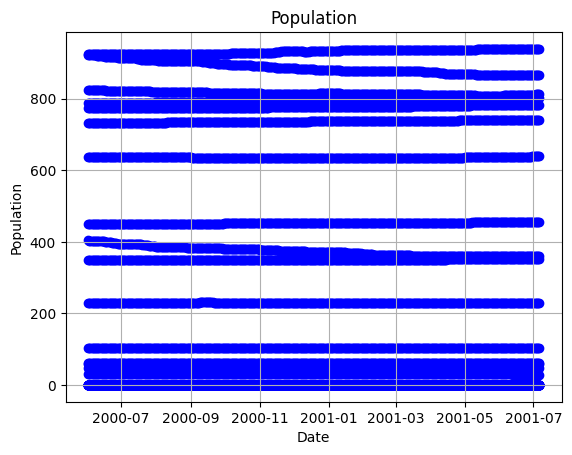

In [14]:
# Sample data
x = data["date"]
y = data[Columns.FEMALE_POPULATION_SIZE] + data[Columns.MALE_POPULATION_SIZE]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Population')

# Show the plot
plt.grid(True)
plt.show()

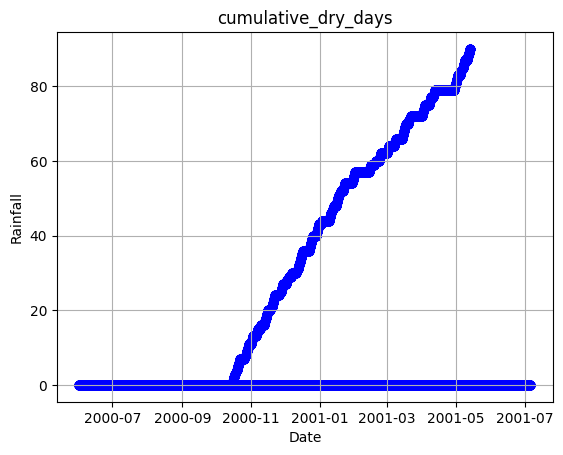

In [15]:
# Sample data
x = data["date"]
y = data[Columns.CUMULATIVE_DRY_DAYS]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('cumulative_dry_days')

# Show the plot
plt.grid(True)
plt.show()

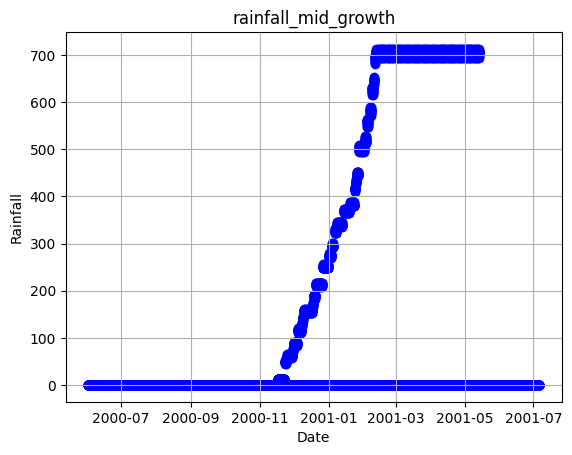

In [16]:
# Sample data
x = data["date"]
y = data[Columns.RAINFALL_MID_GROWTH]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('rainfall_mid_growth')

# Show the plot
plt.grid(True)
plt.show()

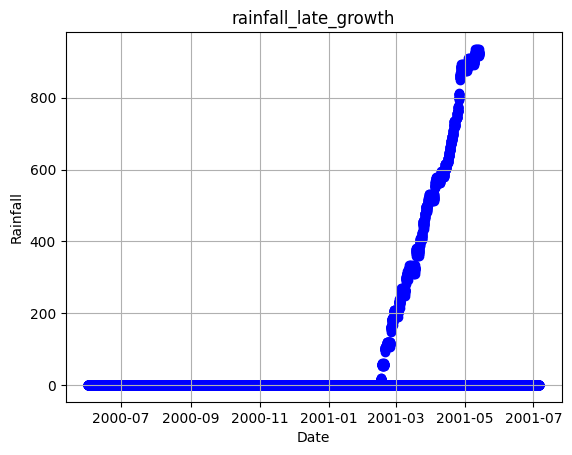

In [17]:
# Sample data
x = data["date"]
y = data[Columns.RAINFALL_LATE_GROWTH]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('rainfall_late_growth')

# Show the plot
plt.grid(True)
plt.show()